## Looking at Jefferson County's retail sales since 2015


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

report = pd.read_csv('Retail_Reports_by_County_in_Colorado.csv')

jeffco = (report[report['county'] == 'Jefferson'].dropna(axis='columns'))

In [2]:
jeffco.head()

,month,year,county,num_returns,gross_sales,retail_sales,state_net_taxable_sales
1,6,2019,Jefferson,37294,2.245013e+09,1.733934e+09,853715000.0
137,5,2019,Jefferson,28005,1.948302e+09,1.648186e+09,803087000.0
138,8,2019,Jefferson,34330,2.108765e+09,1.766135e+09,850444000.0
192,10,2020,Jefferson,40795,2.148189e+09,1.831933e+09,890603000.0
219,1,2019,Jefferson,20457,1.680768e+09,1.442886e+09,643915000.0


after reading in the CSV containing information on all retail revenue in the state, I decided to focus on Jefferson County so I wouldn't get overwhelmed.  The dataset only has partial information for 2021 so I decided to make a stacked bar graph to help the reader get an idea of what the 2021 total retail sales would look like.

In [3]:
jeffco['year'].unique()

array([2019, 2020, 2018, 2015, 2017, 2016, 2021])

The first step was to isolate the retail sales colum for every year.

In [13]:
sales_2015_full = jeffco.loc[((jeffco['year'] == 2015)), ['retail_sales']]

Since the 2021 data only had until August, I found the January-August sales information for all of the years.

In [4]:
jeffco_2015 = jeffco.loc[((jeffco['year'] == 2015) & (jeffco['month'] < 9)), ['retail_sales']]
jeffco_2016 = jeffco.loc[((jeffco['year'] == 2016) & (jeffco['month'] < 9)), ['retail_sales']]
jeffco_2017 = jeffco.loc[((jeffco['year'] == 2017) & (jeffco['month'] < 9)), ['retail_sales']]
jeffco_2018 = jeffco.loc[((jeffco['year'] == 2018) & (jeffco['month'] < 9)), ['retail_sales']]
jeffco_2019 = jeffco.loc[((jeffco['year'] == 2019) & (jeffco['month'] < 9)), ['retail_sales']]
jeffco_2020 = jeffco.loc[((jeffco['year'] == 2020) & (jeffco['month'] < 9)), ['retail_sales']]
jeffco_2021 = jeffco.loc[((jeffco['year'] == 2021) & (jeffco['month'] < 9)), ['retail_sales']]


in 2015, the retail sales data was reported differently.  Instead of the values being to the exact dollar, the data was rounded to the thousands and the three zeros were cut off from the number.  So I needed to adjust that column to match the other columns

In [6]:
sales_2015_full = jeffco.loc[((jeffco['year'] == 2015)), ['retail_sales']]
sales_list = sales_2015_full['retail_sales']
new_2015_sales = []
for item in sales_list:
    new_2015_sales.append(item*1000)

jeffco.loc[jeffco['year'] == 2015, 'retail_sales'] = new_2015_sales

The code below adds up the total retail sales by year so I can graph it

In [7]:
by_year = jeffco.groupby('year').sum()
annual_retail_sales = by_year['retail_sales']

Then I needed to make a list of the January-August retail sales numbers (I needed to adjust the 2015 value again)

In [8]:
jan_thru_aug = [round(jeffco_2015['retail_sales'].sum()*1000, -3), jeffco_2016['retail_sales'].sum(), jeffco_2017['retail_sales'].sum(),
                jeffco_2018['retail_sales'].sum(), jeffco_2019['retail_sales'].sum(), jeffco_2020['retail_sales'].sum(),
                round(jeffco_2021['retail_sales'].sum(), -3)]
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']

In [9]:
jan_thru_aug

[10984609000.0,
 10899170000.0,
 11349655000.0,
 11695989000.0,
 13274633000.0,
 15015906000.0,
 16044702000.0]

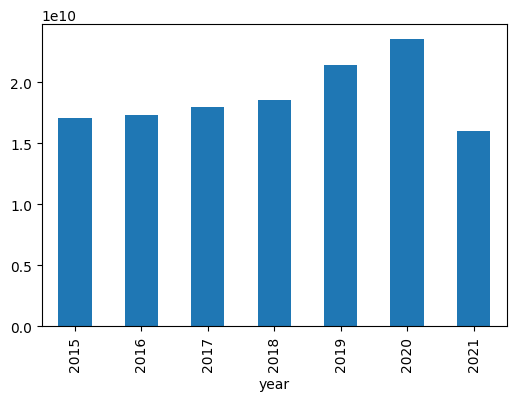

In [10]:
annual_retail_sales.plot.bar()

<BarContainer object of 7 artists>

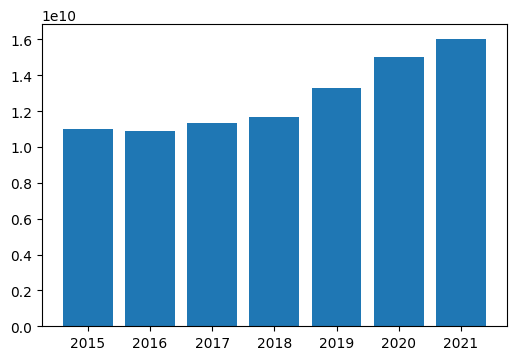

In [11]:
plt.bar(years, jan_thru_aug)

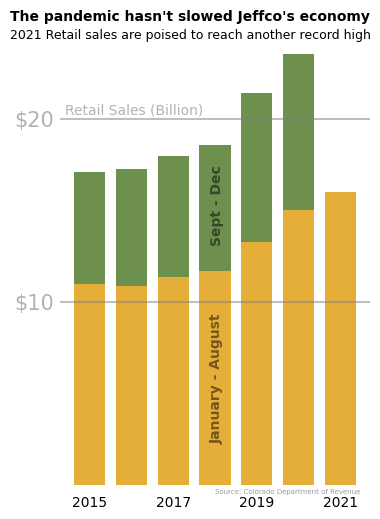

In [12]:
fig, ax=plt.subplots(figsize=(4, 6))

fig.text(0, 0.9, "The pandemic hasn't slowed Jeffco's economy", weight='bold')
fig.text(0, 0.87, "2021 Retail sales are poised to reach another record high", size=9)
fig.text(0.5, 0.2, "January - August", alpha=0.5, rotation=90, weight='bold')
fig.text(0.5, .53, "Sept - Dec", alpha=0.5, rotation=90, weight='bold')


ax.bar(years, annual_retail_sales, color="#6d904f", width=0.75)
ax.bar(years, jan_thru_aug, color="#e5ae38", width=0.75)
ax.set_yticklabels([])
ax.set_xticklabels(['2015','','2017','','2019','','2021'])
for side in ['top', 'bottom', 'left', 'right']:
    ax.spines[side].set_visible(False)
ax.tick_params(left=0, bottom=0)

ax.text(-1.8, 9600000000, "$10", size=15, c='grey', alpha=0.6)
ax.text(-1.8, 19600000000, "$20", size=15, c='grey', alpha=0.6)
ax.text(-.6, 20300000000, "Retail Sales (Billion)", size=10, c='grey', alpha=0.6)
ax.axhline(y=10000000000, c='grey', alpha=0.5)
ax.axhline(y=20000000000, c='grey', alpha=0.5)
ax.text(3, -450000000, "Source: Colorado Department of Revenue", size=5, c='grey', alpha=0.8)


plt.show()
